<a href="https://colab.research.google.com/github/safira123-pixel/PCVK_Genap_2023/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Safira Istifarini

Kelas : TI 3G

Presensi : 17

PRAKTIKUM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

1. GLOBAL TRESHOLD

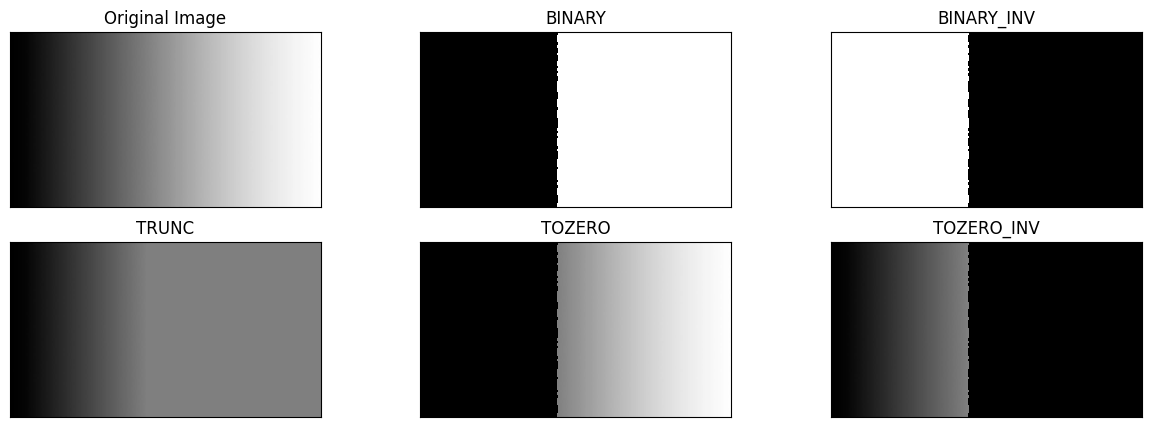

In [13]:
filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

2. ADAPTIVE TRESHOLD

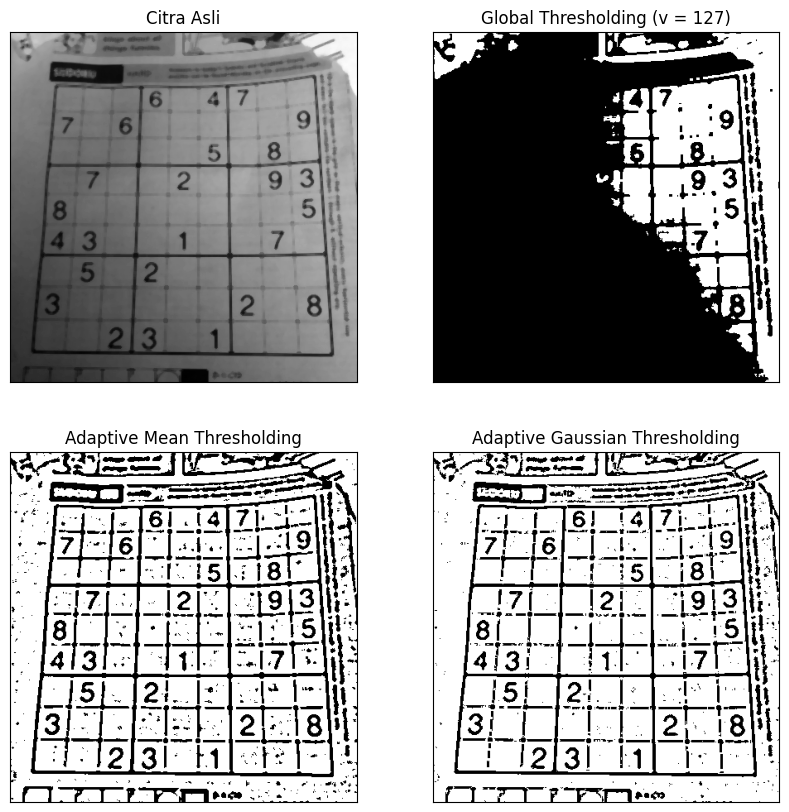

In [14]:
filename = ('/content/drive/MyDrive/PCVK/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show() 

3. OTSU's TRESHOLD

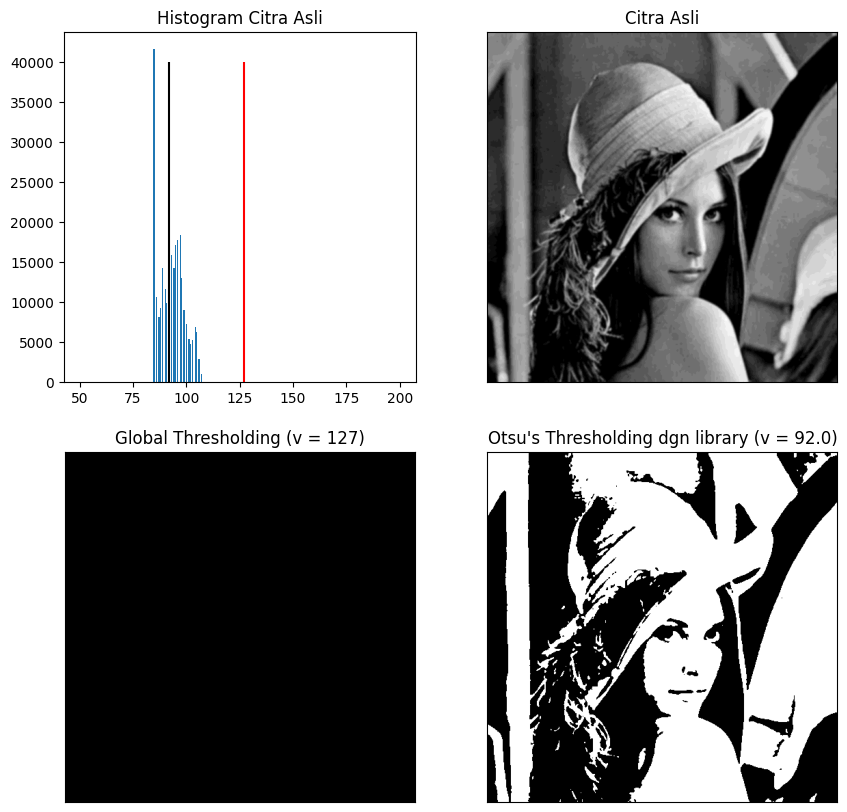

In [15]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

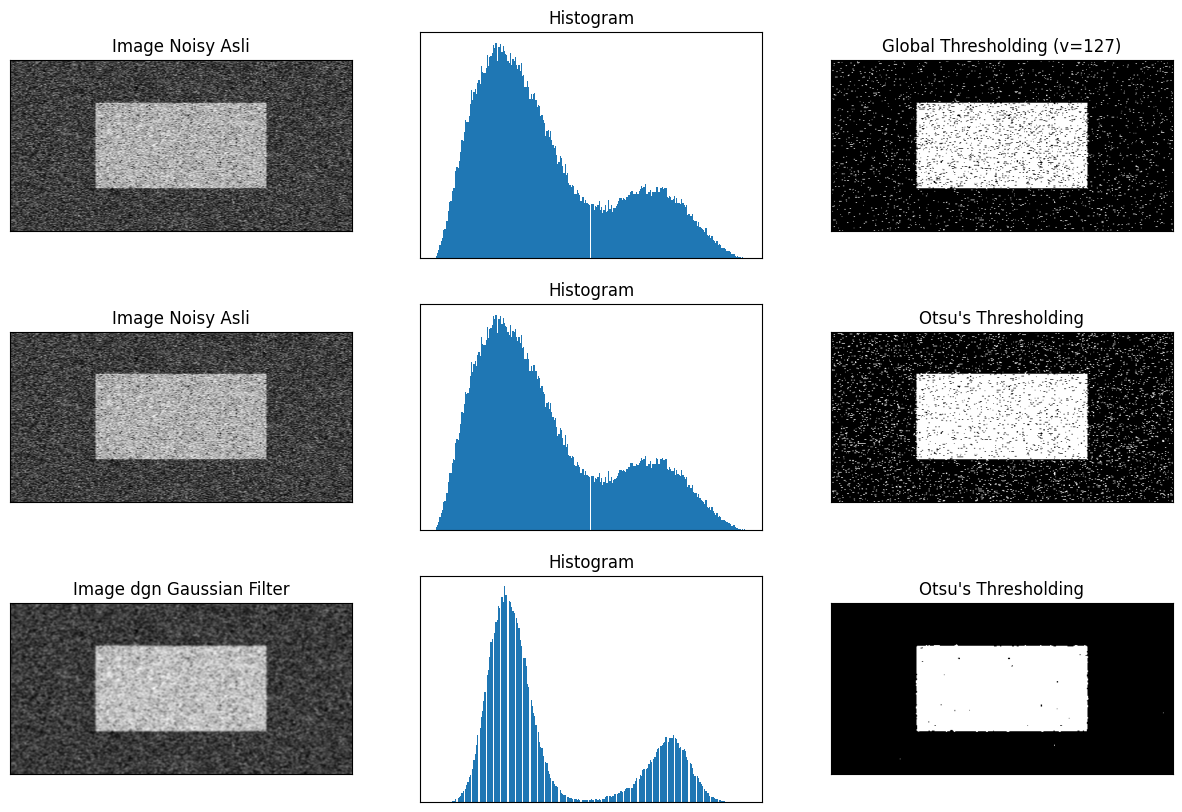

In [16]:
filename = ('/content/drive/MyDrive/PCVK/noisy2.png')
img = cv.imread(filename,0)
#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
 'Image Noisy Asli','Histogram',"Otsu's Thresholding",
 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

4. SEGMENTASI CITRA MENGGUNAKAN K-Means 

(<Axes: >, <matplotlib.image.AxesImage at 0x7f12f14fdb10>)

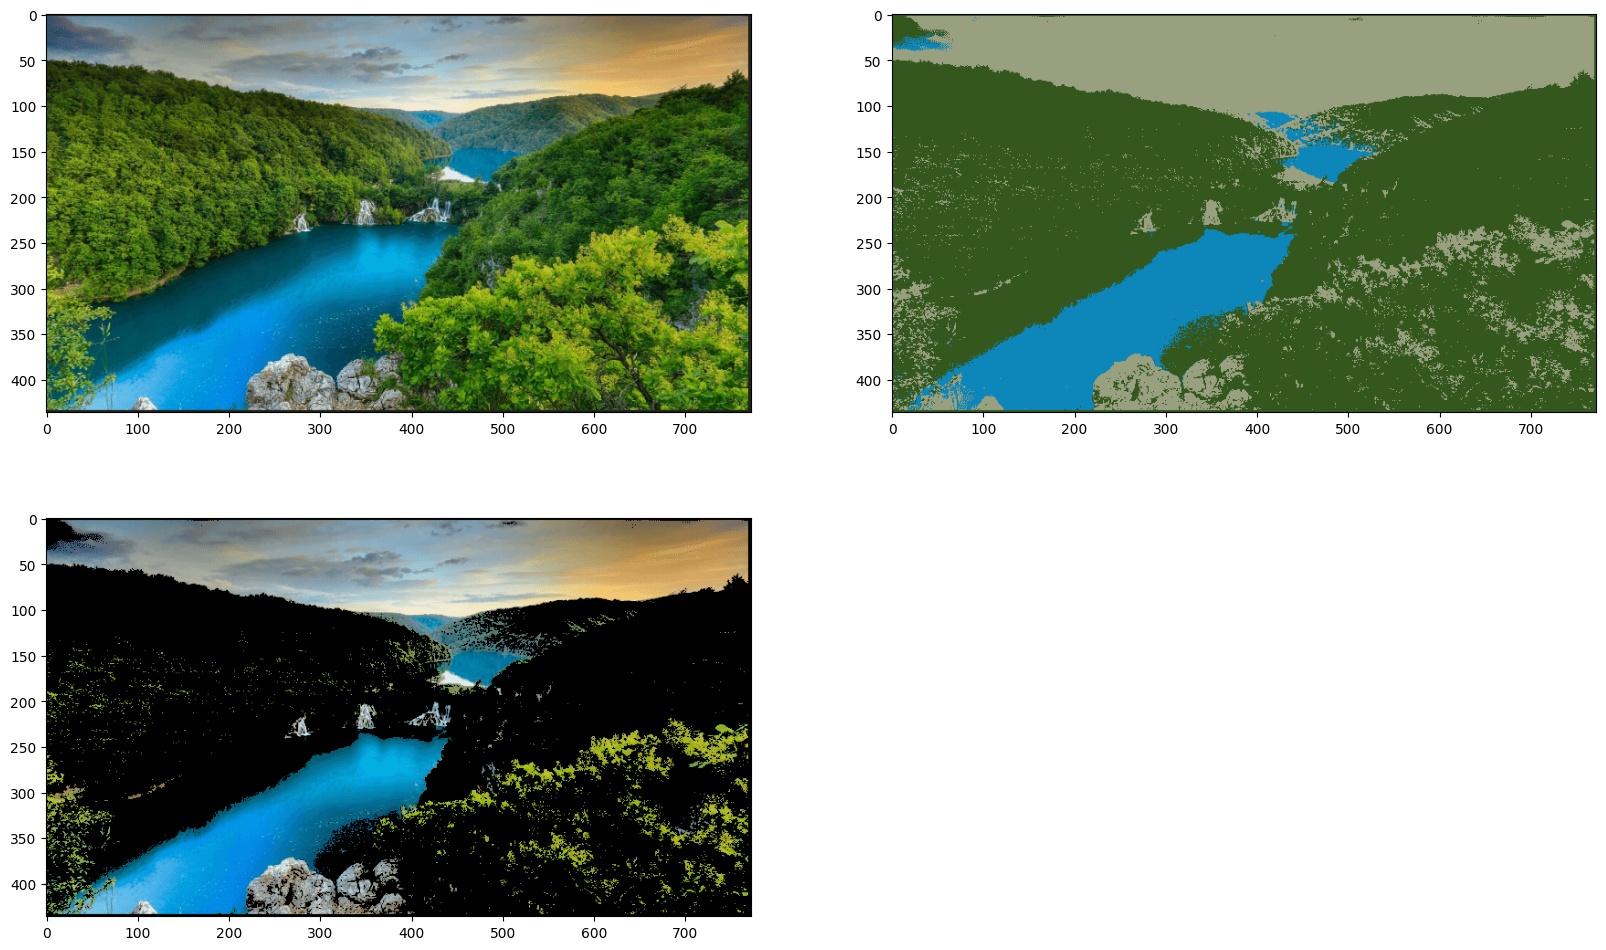

In [17]:
filename = ('/content/drive/MyDrive/PCVK/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)

# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

TUGAS

1. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas. 


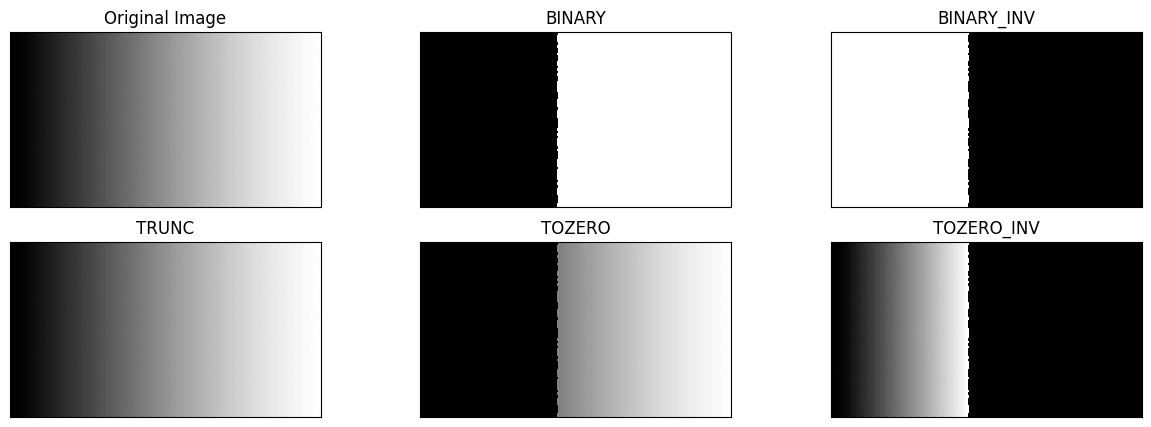

In [18]:
filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1 = np.zeros_like(img)
thresh1[img > thresh] = 255
#2. thresh2 adalah binary threshold inverse
thresh2 = np.zeros_like(img)
thresh2[img <= thresh] = 255
#3. Threshold Truncate
thresh3 = np.copy(img)
thresh3[img >= 300] = thresh
#4. Threshold Tozero
thresh4 = np.copy(img)
thresh4[img <= thresh] = 0
#5. Threshold Tozero Inverse
thresh5 = np.copy(img)
thresh5[img > thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

2. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

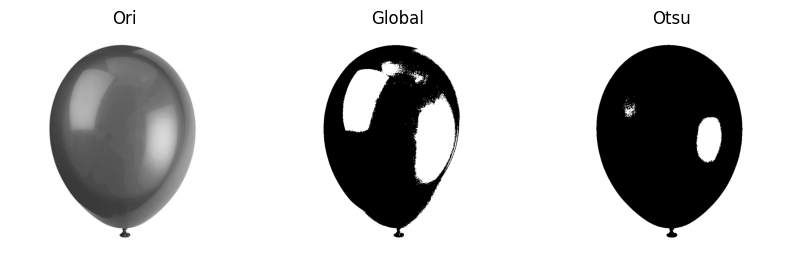

In [19]:
img = cv.imread('/content/drive/MyDrive/PCVK/balloon.jpg', cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.ravel(), 256, [0, 256])
hist_norm = hist.astype(np.float32) / np.sum(hist)

cumsum = np.cumsum(hist_norm)
cumsum_mean = np.cumsum(hist_norm * np.arange(256))

global_mean = cumsum_mean[-1]

# Manual Otsu's Threshold
between_class_var = np.zeros((256,))
for i in range(1, 256):
  w0 = cumsum[i]
  w1 = 1.0 - w0
  if w0 == 0 or w1 == 0:
    continue
  mu0 = cumsum_mean[i] / w0
  mu1 = (global_mean - cumsum_mean[i]) / w1
  between_class_var[i] = w0 * w1 * (mu0 - mu1) ** 2

optimal_thresh = np.argmax(between_class_var)

thresh_img = np.zeros_like(img)
thresh_img[img > optimal_thresh] = 255

# Global Threshold
thresh, gthresh_img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Ori')
axs[1].imshow(gthresh_img, cmap='gray')
axs[1].set_title('Global')
axs[2].imshow(thresh_img, cmap='gray')
axs[2].set_title('Otsu')
for ax in axs:
    ax.set_axis_off()
plt.show()


3. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images. 

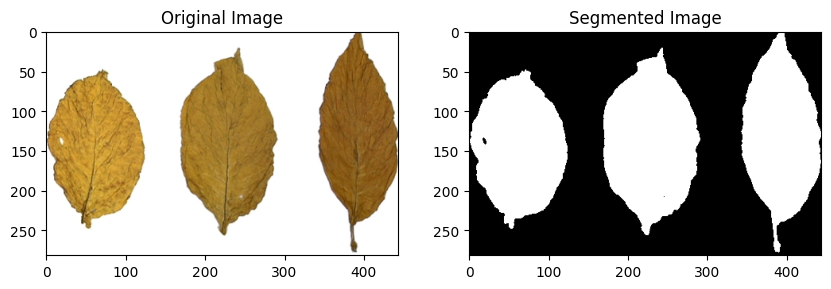

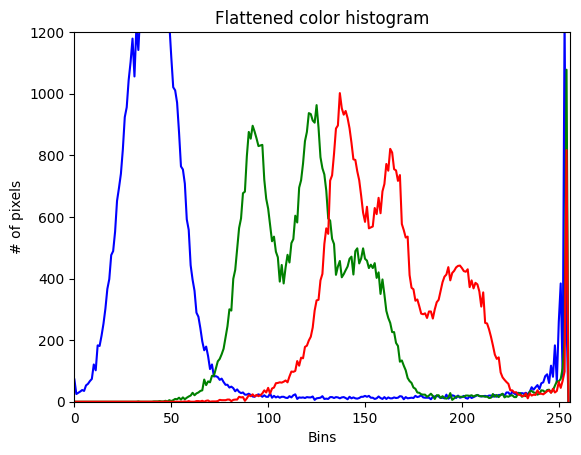

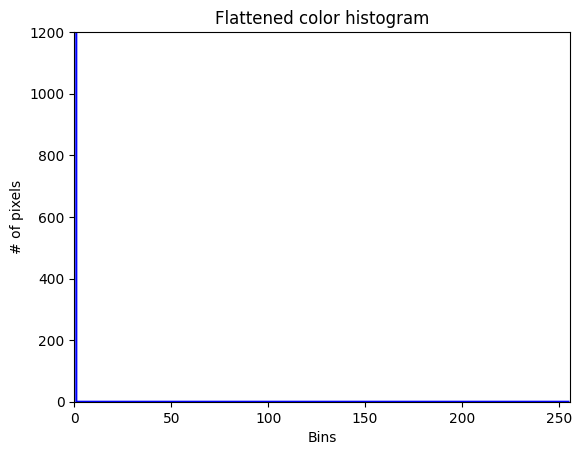

In [20]:
filename = '/content/drive/MyDrive/PCVK/tobacco.jpg'
lily = cv.imread(filename)

lily = cv.cvtColor(lily, cv.COLOR_BGR2RGB)

gray = cv.cvtColor(lily, cv.COLOR_BGR2GRAY)

_, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

thresh = cv.bitwise_not(thresh)

# Plot flattened color histogram
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(lily)
axs[0].set_title('Original Image')
axs[1].imshow(thresh, cmap='gray')
axs[1].set_title('Segmented Image')

histimg = cv.imread(filename)
chans = cv.split(histimg)
colors = 'b', 'g', 'r'

plt.figure()
plt.title('Flattened color histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], None, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 1200])

plt.show()

chans = cv.split(thresh)
colors = 'b', 'g', 'r'

plt.figure()
plt.title('Flattened color histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], None, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 1200])

plt.show()

4, Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja) 

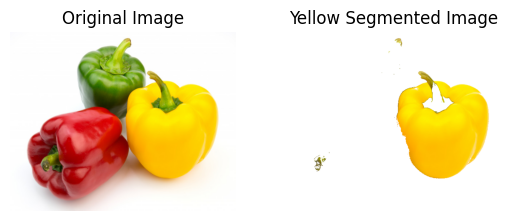

In [12]:
filename = '/content/drive/MyDrive/PCVK/peppers.jpg'
peppers = cv.imread(filename)

# HSV karena agar mudah mengambil warna kuning
hsv = cv.cvtColor(peppers, cv.COLOR_BGR2HSV)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

white_bg = np.ones_like(peppers) * 255

mask = cv.inRange(hsv, lower_yellow, upper_yellow)

mask_inv = cv.bitwise_not(mask)

# mask putih
mask_wbg = cv.bitwise_or(white_bg, white_bg, mask=mask_inv)

yellow_image = cv.bitwise_and(peppers, peppers, mask=mask)
yellow_image_wbg = cv.bitwise_or(mask_wbg, yellow_image)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(cv.cvtColor(peppers, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv.cvtColor(yellow_image_wbg, cv.COLOR_BGR2RGB))
axs[1].set_title('Yellow Segmented Image')
for ax in axs:
    ax.set_axis_off()
plt.show()

Pertanyaan 

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.

Permasalahan yang muncul di atas adalah cara menentukan warna kuning jika menggunakan metode k-means, setelah menentukan untuk tidak menggunakan k-means masalah selanjutnya adalah disaat saya aplikasikan mask pada gambar, background gambar berwarna hitam, solusinya untuk membuat mask yang di invert agar dapat menghasilkan warna putih tadi

